In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#настроим опцию отображения чисел с плавающей запятой
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#откроем файлы с данными
df_model = pd.read_csv('/datasets/query_1.csv')
df_city = pd.read_csv('/datasets/query_3.csv')

In [4]:
#изучим общую информацию датасета df_model
print(df_model.info())
display(df_model.describe())
df_model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


,flights_amount
count,8.00
mean,2035.62
std,1965.20
min,300.00
25%,605.25
50%,795.00
75%,4250.25
max,4557.00


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Датасет с самолетами совсем небольшой: всего 2 столбца и лишь 8 записей. Данные в таком датасете можно оценить невооруженным глазом, тем не менее, я использовал стандартный набор функций для первичного анализа данных: `info`, `describe` и вывод таблицы. На первый взгляд, с данными все в порядке: нет нареканий как к данным, так и их типам; пропусков и дублей не обнаружено.

Что же касается первого взгляда на сами данные, то очевидно лидерство тройки "Bombardier-Cessna-Sukhoi": число их полетов исчисляется тысячами, в отличие от конкурентов. Возможно, это связано с ценой самолетов: отечественные авиакомпании (внутренные рейсы в основном обслуживаются ими) предпочитают более дешевые марки, и соответственно, парк их самолетов по большей части (а то и полностью) состоит из них. Следовательно, большую часть рейсов выполняют самолеты менее "раскрученных" марок.

In [5]:
#изучим общую информацию датасета df_city
print(df_city.info())
display(df_city.describe())
df_city.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


,average_flights
count,101.00
mean,5.49
std,13.12
min,1.00
25%,2.00
50%,3.00
75%,5.87
max,129.77


,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45


Размер датасета с городами тоже не впечатляет: всего 101 запись при тех же двух столбцах. Здесь применение привычных методов первичного анализа данных (`info`, `describe` и `head`) чуть более оправдано: оценивать таблицу целиком уже трудно. Как и в случае предыдущего датасета, с данными все в порядке: типы данных соответствуют ожиданиям; пропусков и дублей не обнаружено; заголовки столбцов имеют нормальный вид.

Перейдя к оценке данных, повторюсь, что оценивать их целиком уже несколько проблематично, но метод `describe` все же выдает нам некую первичную аналитику. Например, я заметил, что среднее и медиана сильно сдвинуты влево: очевидно, что в половину городов прибывают в среднем менее 3 рейсов в день, в то время как существует чемпион (вероятно, Москва), принимающий  за день в среднем 130 рейсов.

In [6]:
#проверим типы данных в датасетах на корректность
display(df_model.dtypes)
display(df_city.dtypes)

model             object
flights_amount     int64
dtype: object

city                object
average_flights    float64
dtype: object

In [7]:
#проверим датасеты на наличие пропусков в них
display(df_model.isna().sum())
display(df_city.isna().sum())

model             0
flights_amount    0
dtype: int64

city               0
average_flights    0
dtype: int64

In [8]:
#проверим датасеты на наличие дубликатов в них
print('Кол-во дубликатов в датасете df_model: ', df_model.duplicated().sum())
print('Кол-во дубликатов в датасете df_city: ', df_city.duplicated().sum())

Кол-во дубликатов в датасете df_model:  0
Кол-во дубликатов в датасете df_city:  0


Дополнительная проверка типов данных, наличия пропусков и дубликатов потвердила первоначальные выводы о том, что данные обоих датасетов полностью корректны и готовы к полноценному анализу.

In [9]:
#выберем топ-10 городов по количеству рейсов
top_ten = df_city.sort_values(by='average_flights', ascending=False).head(10).copy()
display(top_ten)

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


Применив сортировку данных, я создал таблицу, содержащую данные о десяти городах, принимавших больше всего рейсов в день (в среднем) за отчетный период. Первое место - ожидаемо - за Москвой (ранее, я выдвигал такую гипотезу). По моему мнению, Москва лидирует благодаря учету пересадочных рейсов: большинство пересадок совершаются именно в столичных аэропортах. Кроме того, возможно, из Москвы наиболее удобно добираться до большинства фестивалей.

Второе место также вполне ожидаемо занял Санкт-Петербург, в то время как распределение остальных городов в итоговой таблице было трудно предсказуемо.

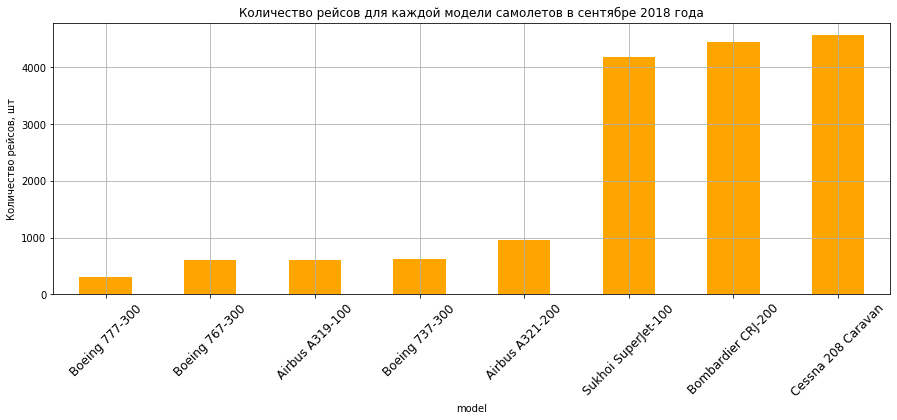

In [10]:
#построим график датасета df_model
(df_model.sort_values(by='flights_amount')
         .plot(kind = 'bar', x = 'model', figsize=(15,5), color = 'orange', grid = True, legend=False))
plt.xticks(rotation=45, fontsize = 12)
plt.title('Количество рейсов для каждой модели самолетов в сентябре 2018 года')
plt.ylabel('Количество рейсов, шт')
plt.show()

Построив столбчатую диаграмму таблицы с данными о самолетах, я смог наглядно продемонстрировать результат первичного анализа этих данных, полученный ранее. Повторюсь, что лидерство тройки "Bombardier-Cessna-Sukhoi" является очевидным: они многократно (в 4-10 раз) превосходят конкурентов из Airbus и Boeing. Также повторю свои предположения относительно причин подобного распределения: на мой взгляд, это может быть связано с ценой самих самолетов: отечественные авиакомпании, которые в основном обсуживают внутренние рейсы, предпочитают более дешевые марки, и соответственно, парк их самолетов по большей части (а то и полностью) состоит из них. Следовательно, большую часть рейсов выполняют самолеты менее "раскрученных" марок: Bombardier, Cessna, Sukhoi.

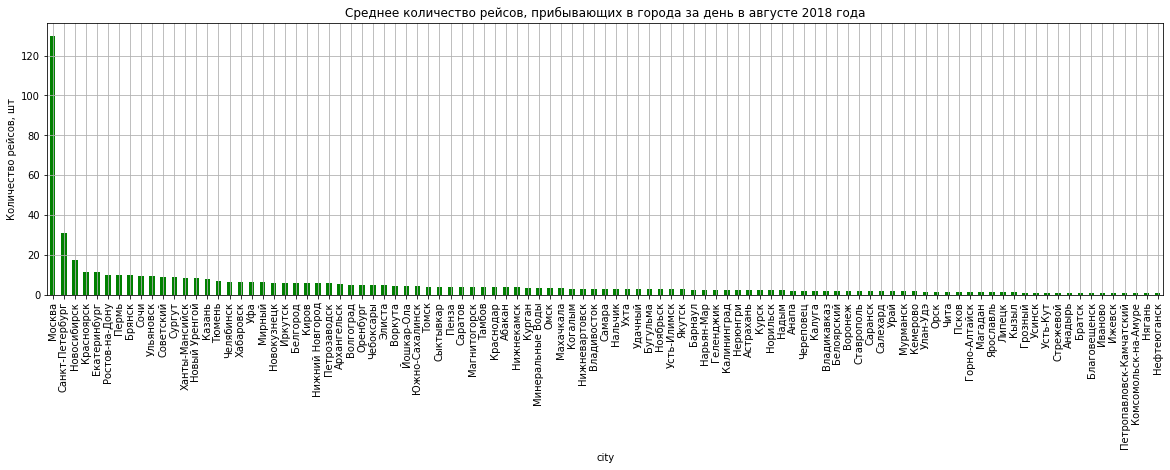

In [11]:
#построим график датасета df_city
(df_city.sort_values(by='average_flights', ascending=False)
        .plot(kind = 'bar', x = 'city', figsize=(20,5), color = 'green', grid = True, legend=False))
plt.xticks(rotation=90, fontsize = 10)
plt.title('Среднее количество рейсов, прибывающих в города за день в августе 2018 года')
plt.ylabel('Количество рейсов, шт')
plt.show()

Построив столбчаютую диаграмму датасета с данными о городах, я смог наглядно продемонстрировать, что Москва лидирует с большим отрывом и превосходит топ-2 - Санкт-Петербург - в четыре с лишним раза, не говоря об остальных городах. Вероятную причину столь значительного перевеса я озвучивал ранее: по моему мнению, подобная ситуация возможна благодаря учету пересадочных рейсов: большинство пересадок совершаются именно в столичных аэропортах. Кроме того, возможно, из Москвы наиболее удобно добираться до большинства фестивалей.

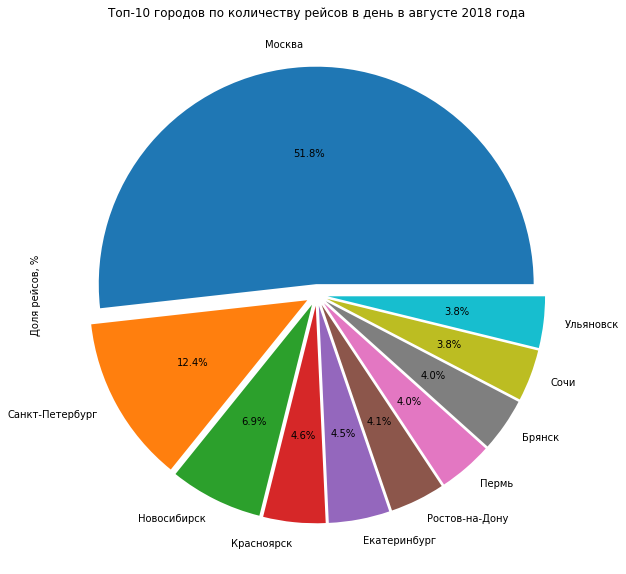

In [12]:
#построим график датасета top_ten
top_ten.index = top_ten['city']
plt.subplots(figsize=(15,10))
explode = [0.05 for i in range(len(top_ten['city']))]
plt.pie(top_ten['average_flights'], autopct = '%.1f%%', labels = top_ten['city'], explode=explode)
plt.title('Топ-10 городов по количеству рейсов в день в августе 2018 года')
plt.ylabel('Доля рейсов, %')
plt.show()

Взглянув ближе на данные о рейсах и построив круговую диаграмму таблицы с топ-10 городов по количеству рейсов в день, можно сделать следующий вывод: даже среди десятки лидеров Москве принадлежит большая часть рейсов (51.8%). Санкт-Петербургу принадлежит 1/8 рейсов, а замыкает тройку Новосибирск с 7% рейсов. Оставшиеся семь участников топ-10 имеют результат от 3.8% до 4.6%.

# Общий вывод

Как гласит описание проекта, «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки, а значит, как и большинство российских авиакомпаний, предпочитает "аэробусам" и "боингам" менее "раскрученные" (а значит, и дорогие) марки самолетов, такие как: Bombardier, Cessna и Sukhoi. Отсюда складывается картина: число рейсов, осуществленных на самолетах производства вышеозвученной тройки, превышает у каждой модели четыре тысячи в месяц, что в 4-10 раз больше, чем число рейсов, осуществленных на самолетах марок Airbus и Boeing.

Что же касается предпочтений пассажиров в выборе направлений для перелетов, то Москва ежедневно принимает по 130 рейсов и лидирует с большим отрывом, превосходя ближайшего конкурента - Санкт-Петебрбург - в четыре с лишним раза, не говоря об остальных городах, которые в большинстве своем довольствуются за день не более, чем тремя рейсами. На мой взгляд, подобная ситуация возможна благодаря учету пересадочных рейсов: большинство пересадок совершаются именно в столичных аэропортах. Кроме того, не исключена вероятность того, что из Москвы наиболее удобно добираться до мест проведения большинства фестивалей.

Наконец, взглянув ближе на данные о рейсах, можно сделать следующий вывод: даже среди десятки лидеров по числу рейсов в день Москве принадлежит большая часть - 51.8%. "Серебряному призеру" рейтинга - Санкт-Петербургу - принадлежит 1/8 рейсов, а замыкает тройку Новосибирск с 7% рейсов. Оставшиеся семь участников топ-10 имеют результат от 3.8% до 4.6%.

На мой взгляд, ситуация с выбором локаций для проведения фестивалей представляет собой типичный замкнутый круг: из-за высокой транспортной доступности организаторы фестивалей отдают предпочтение московскому региону, что, в свою очередь, лишает инвестиций другие регионы, ведь никто не проводит фестивали у них. Практика показывает, что для гостей фестивалей транспортая доступность значит много, следовательно, до тех пор, пока фестивали не уйдут в другие регионы, Москва продолжит лидировать в данном рейтинге.